In [13]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

Filter for UK Data Scientist Roles

In [36]:
df_DS_UK = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] == 'Data Scientist')]
df_DS_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"[react, docker]","{'libraries': ['react'], 'other': ['docker']}"
280,Data Scientist,Data Scientist - Autonomy Dependability,"Porton Down, Salisbury, UK",via WJHL Jobs,Full-time,False,United Kingdom,2023-07-20 13:15:45,False,False,United Kingdom,None,NaN,NaN,DEFENCE SCIENCE AND TECHNOLOGY LABORATORY,None,None
400,Data Scientist,Data Scientist - Business Analytics - Chase,"London, UK",via KSNT Jobs,Full-time,False,United Kingdom,2023-08-21 13:15:46,False,False,United Kingdom,None,NaN,NaN,Jobleads-UK,"[sql, python]","{'programming': ['sql', 'python']}"
491,Data Scientist,Data Scientist,United Kingdom,via LinkedIn,Full-time,False,United Kingdom,2023-10-19 13:36:47,False,False,United Kingdom,None,NaN,NaN,MRJ Recruitment,"[sql, python]","{'programming': ['sql', 'python']}"
636,Data Scientist,Data Scientist - Pricing analyst,United Kingdom,via Careermap,Full-time,False,United Kingdom,2023-01-24 13:17:10,False,False,United Kingdom,None,NaN,NaN,Careermap,"[python, r, sql]","{'programming': ['python', 'r', 'sql']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784351,Data Scientist,MSc in Geo-Energy with Machine Learning and Da...,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:29,False,False,United Kingdom,None,NaN,NaN,Earthworks,None,None
784635,Data Scientist,Data Scientist,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:17,False,False,United Kingdom,None,NaN,NaN,Humanity,"[python, java, scala]","{'programming': ['python', 'java', 'scala']}"
784804,Data Scientist,Lead Data Scientist,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-07-22 06:16:02,False,False,United Kingdom,None,NaN,NaN,Harnham,[python],{'programming': ['python']}
784963,Data Scientist,"Product Data Scientist, Bitcoin Wallet","London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:23,False,False,United Kingdom,None,NaN,NaN,Verse,"[python, r, sql, go, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."


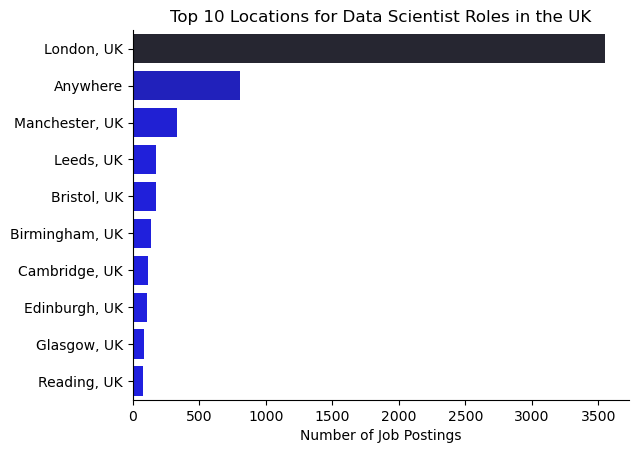

In [38]:
exclude_locations = ['United Kingdom', 'England, UK']
df_plot = df_DS_UK['job_location'].loc[~df_DS_UK['job_location'].isin(exclude_locations)].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x= 'count', y= 'job_location',hue= 'count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 Locations for Data Scientist Roles in the UK')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()

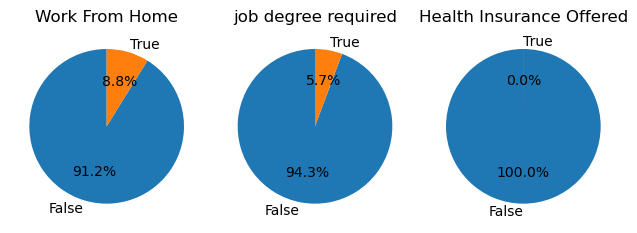

In [40]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'job degree required',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate (dict_column.items()):
    ax[i].pie(df_DS_UK[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


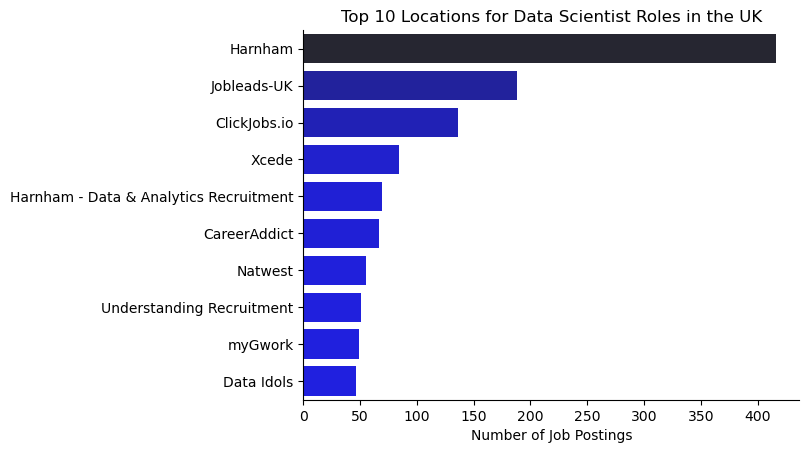

In [41]:
exclude_locations = ['United Kingdom', 'England, UK']
df_plot = df_DS_UK['company_name'].loc[~df_DS_UK['company_name'].isin(exclude_locations)].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x= 'count', y= 'company_name',hue= 'count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 Locations for Data Scientist Roles in the UK')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()